In [680]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
path = '/Users/tae/Desktop/Project/image/1Grape_healthy/*'


from skimage import io, color, filters, morphology, segmentation , transform

In [117]:
# image = io.imread(glob.glob(path)[0])
# gray_image = color.rgb2gray(image)
# sobel = filters.sobel(gray_image)
# sobel= np.uint8(sobel * 255)



# markers = morphology.label(sobel < (0.2 * sobel.max()), connectivity=1)
# labels = segmentation.watershed(sobel, markers)
# labels_n = morphology.remove_small_objects(labels, min_size=50)
# maping = color.label2rgb(markers, image=gray_image, bg_label=1)

# plt.imshow(labels)

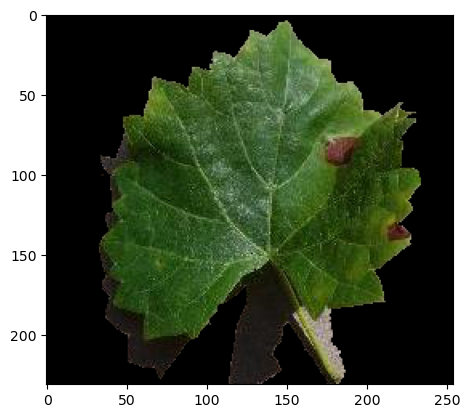

In [157]:
# Cut background
img_rgb = io.imread(glob.glob(path)[20])

mask = np.zeros(img_rgb.shape[:2],np.uint8)
bgModel = np.zeros((1,65) , np.float64)
fgModel = np.zeros((1,65) , np.float64)
rect = (3,3,img_rgb.shape[0],img_rgb.shape[1])

cv2.grabCut(img_rgb , mask , rect , bgModel, fgModel, 2 , cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0 ), 0, 1).astype('uint8')

#result
img_cut = img_rgb * mask2[:,:,np.newaxis]

plt.imshow(img_cut )

In [178]:
def grab_cut(img_rgb):
    
    mask = np.zeros(img_rgb.shape[:2],np.uint8)
    bgModel = np.zeros((1,65) , np.float64)
    fgModel = np.zeros((1,65) , np.float64)
    rect = (3,3,img_rgb.shape[0],img_rgb.shape[1])

    cv2.grabCut(img_rgb , mask , rect , bgModel, fgModel, 2 , cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0 ), 0, 1).astype('uint8')

    #result
    image = img_rgb * mask2[:,:,np.newaxis]

    
    return image

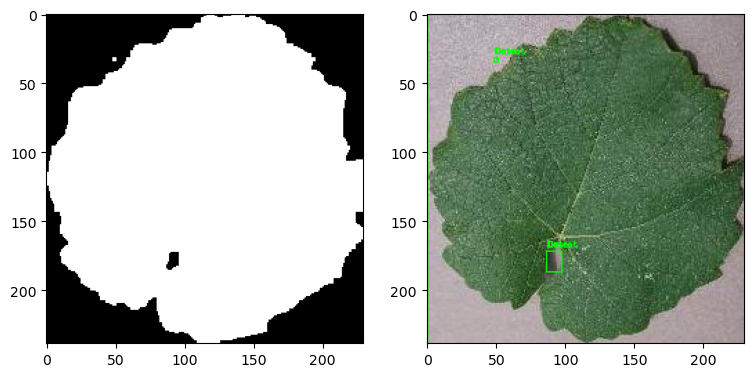

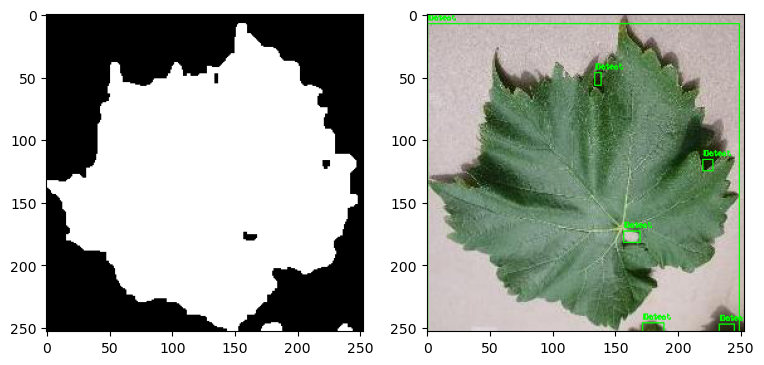

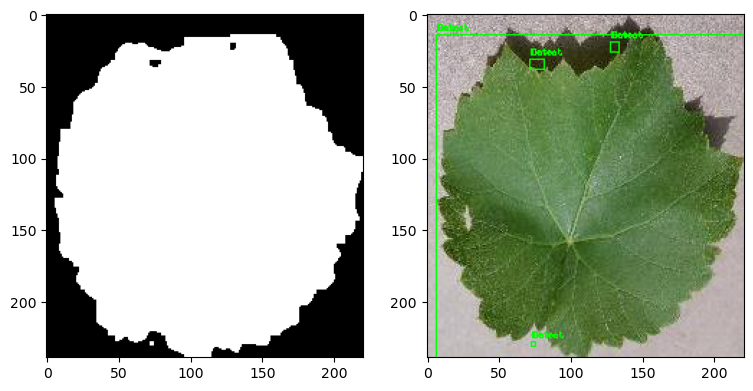

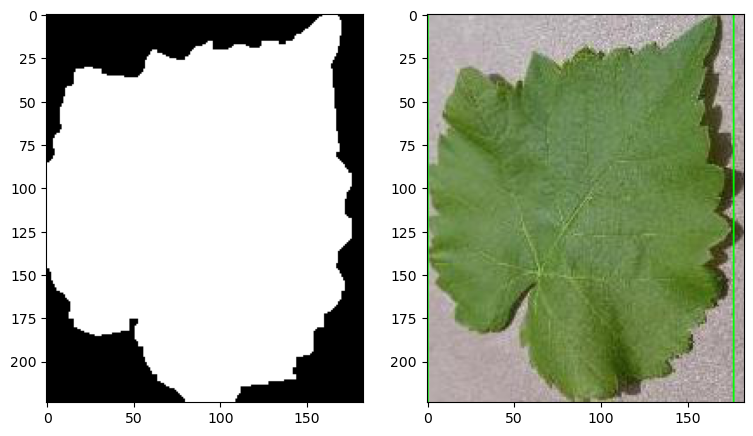

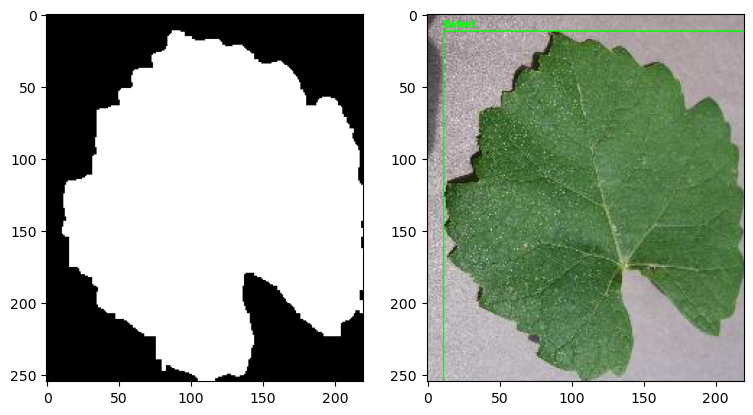

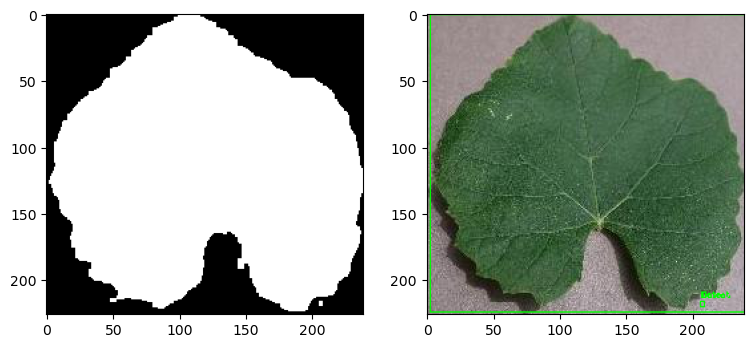

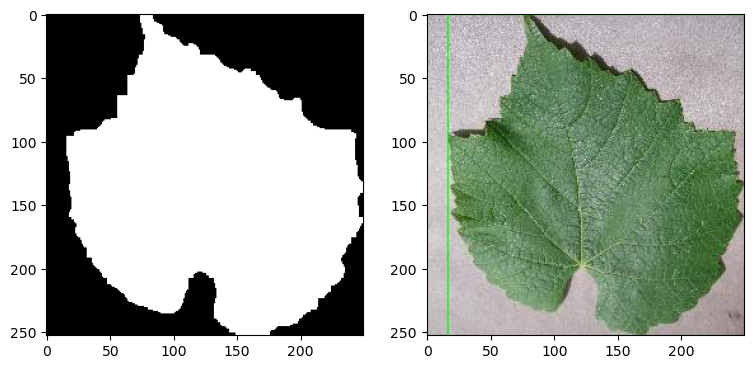

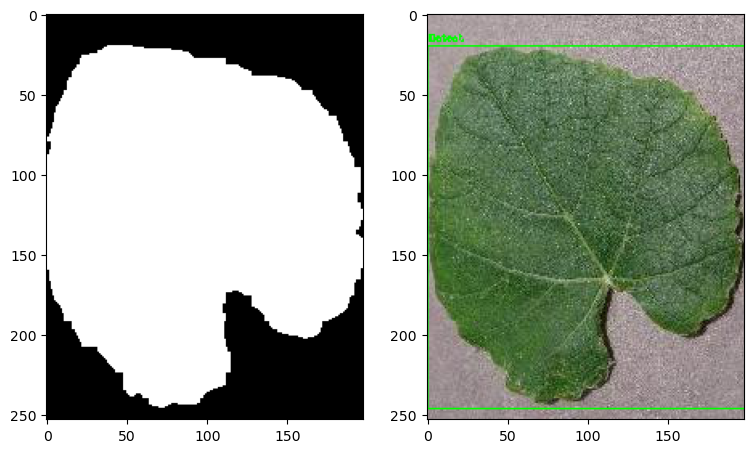

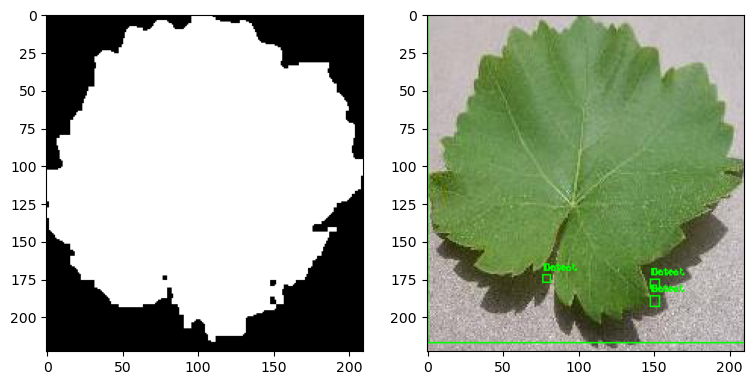

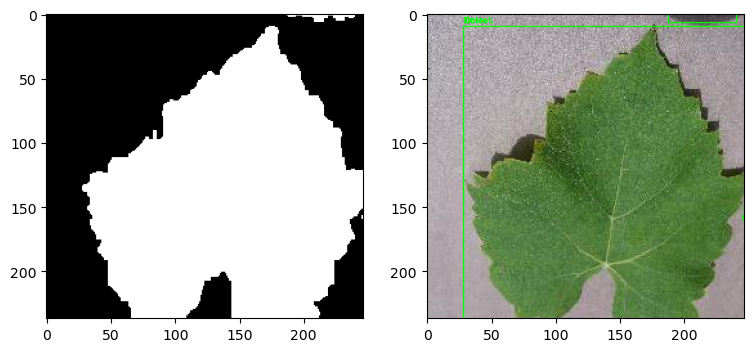

In [681]:


for i in range(10):
    img_rgb = io.imread(glob.glob(path)[i])
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    lower_green = np.array([25, 20, 20])  
    upper_green = np.array([150, 255, 255])


    #Create mask 
    mask_green = cv2.inRange(img_hsv, lower_green, upper_green)



    #invert
    mask_not_green = cv2.bitwise_not(mask_green)

    #merge
    final = cv2.bitwise_and(img_rgb,img_rgb ,  mask=mask_not_green)



    #Gray scale
    img_gray = cv2.cvtColor(final , cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(mask_not_green,0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


    # Apply morphological operations to remove noise
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=1)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)


    #contour
    contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_copy = img_rgb.copy()


    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv2.putText(img_copy, f'Detect' ,(x, y-3), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.3, (0, 255, 0), 1)


    plt.figure(figsize=(9,20))
    plt.subplot(121)
    plt.imshow(closing , cmap='gray')
    plt.subplot(122)
    plt.imshow(img_copy, cmap='gray')
